In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
scikit = ["moons", "blobs", "circles", "high-order-informative", "ho-slightly-redundant", 
          "ho-redundant", "ho-useless", "ho-general", "aniso", "random"]

custom = ["triangle", "squares-leve-sobreposto", "hexagonsobreposto", "square", "trianglesobreposto",
          "linemessy", "hexagon", "lineblobs", "hexagonmuitosobre", "squaresmuitosobre"]

real = ["obesity", "maintenance", "telescope", "wine_quality", "yeast", "banknote", "rice", "abalone", "beans", "raisins"]

In [50]:
df = pd.read_csv("../results/full_results.csv")
df.head()

,instance,radius,silhouette,adj_rand_score,exec_time,method,p
0,moons,1.016695,0.488145,0.236615,1.253436,scikit,2
1,moons,1.016695,0.488145,0.236615,1.112716,scikit,2
2,moons,1.016695,0.488145,0.236615,1.067581,scikit,2
3,moons,1.016695,0.488145,0.236615,1.079454,scikit,2
4,moons,1.016695,0.488145,0.236615,1.117488,scikit,2


In [51]:
grouped = df.groupby(["instance", "method", "p"]).aggregate(['mean', 'std'])
grouped

radius           silhouette            \
                                 mean       std       mean       std   
instance method           p                                            
abalone  greedy           1  0.598083  0.015653   0.209230  0.052888   
                          2  0.299229  0.008100   0.231515  0.050166   
         refining0.015625 1  0.558900  0.014499   0.262419  0.042139   
                          2  0.281847  0.010062   0.290558  0.031242   
         refining0.03125  1  0.561133  0.014691   0.262826  0.047470   
...                               ...       ...        ...       ...   
yeast    refining0.125    2  0.545056  0.024512   0.188801  0.048662   
         refining0.25     1  1.036333  0.056720   0.150764  0.033662   
                          2  0.542067  0.019835   0.195296  0.049287   
         scikit           1  1.621509  0.210294   0.159881  0.008660   
                          2  0.749074  0.047737   0.171701  0.009298   

                            adj_rand_score           exec_time            
                                      mean       std      mean       std  
instance method           p                                               
abalone  greedy           1       0.066796  0.003851  0.508055  0.021810  
                          2       0.071117  0.003719  0.452368  0.043412  
         refining0.015625 1       0.069277  0.003905  6.285018  0.666339  
                          2       0.069556  0.004621  6.231800  0.614850  
         refining0.03125  1       0.069511  0.004421  6.498566  0.480320  
...                                    ...       ...       ...       ...  
yeast    refining0.125    2       0.094445  0.043000  0.755529  0.098344  
         refining0.25     1       0.088224  0.035936  0.760245  0.077972  
                          2       0.083204  0.032994  0.756805  0.080305  
         scikit           1       0.135634  0.013973  0.054187  0.008571  
                          2       0.134313  0.012439  0.052704  0.005747  

[420 rows x 8 columns]

In [52]:
scikit_df = grouped.loc[scikit].reset_index()
real_df = grouped.loc[real].reset_index()
custom_df = grouped.loc[custom].reset_index()

scikit_df

instance            method  p    radius           silhouette            \
                                       mean       std       mean       std   
0      moons            greedy  1  2.156120  0.234758   0.440552  0.056809   
1      moons            greedy  2  1.551465  0.143431   0.440241  0.034039   
2      moons  refining0.015625  1  1.892913  0.299511   0.438024  0.046184   
3      moons  refining0.015625  2  1.345970  0.137932   0.466800  0.020781   
4      moons   refining0.03125  1  1.881915  0.199600   0.417785  0.065017   
..       ...               ... ..       ...       ...        ...       ...   
135   random     refining0.125  2  0.841812  0.071194   0.307997  0.030013   
136   random      refining0.25  1  0.988213  0.075915   0.313366  0.025277   
137   random      refining0.25  2  0.793436  0.091696   0.321058  0.027970   
138   random            scikit  1  0.743054  0.007863   0.388963  0.008813   
139   random            scikit  2  0.556031  0.002109   0.365552  0.010873   

    adj_rand_score           exec_time            
              mean       std      mean       std  
0         0.266913  0.132302  0.000669  0.000083  
1         0.203420  0.080793  0.000700  0.000126  
2         0.219149  0.092211  0.112834  0.005756  
3         0.262212  0.057984  0.109036  0.010394  
4         0.225764  0.121611  0.109003  0.012075  
..             ...       ...       ...       ...  
135       0.000088  0.002599  0.098652  0.009973  
136       0.000253  0.003198  0.102635  0.010714  
137      -0.000078  0.002912  0.103053  0.008421  
138      -0.001703  0.000264  0.010701  0.011392  
139      -0.001806  0.000192  0.016775  0.016797  

[140 rows x 11 columns]

<Axes: xlabel='instance', ylabel="('radius', 'std')">

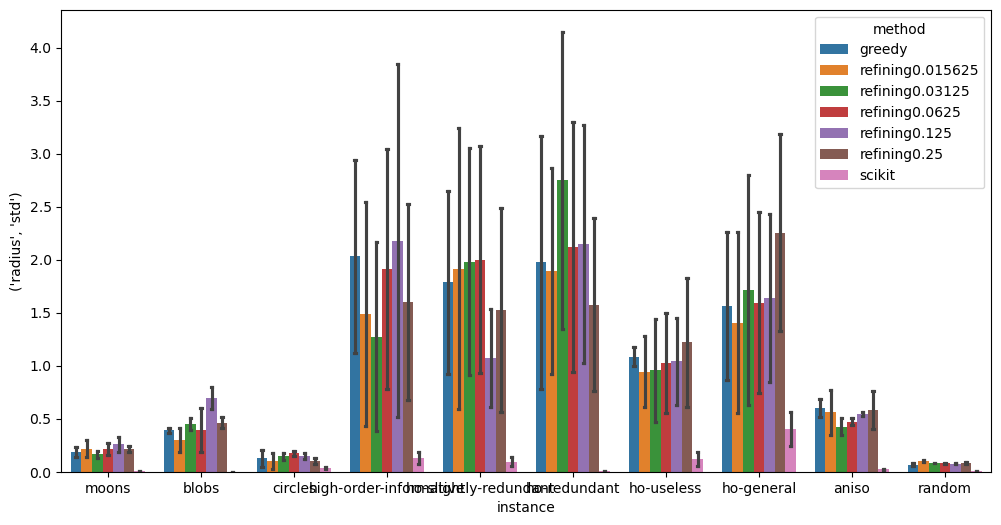

In [61]:
plt.figure(figsize=(12, 6))
sns.barplot(x='instance', y=('radius', 'std'), hue='method', data=scikit_df, errorbar=None,capsize=.1)